<a href="https://colab.research.google.com/github/piquelab/popgen-notes/blob/master/colab/WF_loss_of_het.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loss of heterozygosity due to drift
---

This google colab is modified from Graham Coop: https://github.com/cooplab/popgen-notes/blob/master/Rcode/Loss_of_heterozyg_varying_pop.R




In [1]:
install.packages("plotrix")
library("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
simulate.pop<-function(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.1, for.class= TRUE, initial.state="all.black",plot.freqs=FALSE,mult.pop=FALSE,pops=FALSE){
   #  c(rep(10,5),rep(3,2),rep(10,5),rep(3,2),rep(10,5))  #
	stopifnot(initial.state %in% c("all.black","all.diff","two.alleles","single.mut") )

	if(plot.freqs){ layout(c(1,2)); par(mar=c(1,2,0,1))}
	if(for.class){
		line.lwd<-1
		line.col<-"black"
		mut.line.lwd<-1
		mut.line.col<-"black"

	}else{
		line.lwd<-0.5
		line.col<-"grey"
		mut.line.lwd<-1
		mut.line.col<-"grey"
	}

	num.gens<- length(N.vec)-1

	if(!mult.pop){
		ind.pop.par<-matrix(1,nrow=max(N.vec),ncol=num.gens+1)
		ind.pop<-matrix(1,nrow=max(N.vec),ncol=num.gens+1)
	}else{
			ind.pop.par<-pops[["ind.pop.par"]]
			ind.pop<-pops[["ind.pop"]]
	}

	num.gens<- length(N.vec)-1
	offset<-0.1
	plot(c(1,num.gens),c(0.5,max(N.vec))+c(-offset,offset),type="n",axes=FALSE,xlab="",ylab="")
	mtext(side=1,line=0,"Generations")
	 text(1,0.5,"Past")
	 text(num.gens-1,0.5,"Present")

	 track.cols<- list()
	N <-N.vec[1]
	 if(initial.state=="all.black") my.cols<-rep("black",2*N)  #sample(rainbow(2*N))
	 if(initial.state=="all.diff") my.cols<-sample(rainbow(2*N))
	 if(initial.state=="two.alleles")  my.cols<-  rep(c("blue","red"),N)
	 if(initial.state=="single.mut")  my.cols<-  c("red",rep("blue",2*N-1))
	 stopifnot((2*N)==length(my.cols))

	 track.cols[[1]]<-my.cols
	points(rep(1,N),1:N+offset, pch=19,cex=1.3,col=my.cols[(1:N)*2])
	 points(rep(1,N),1:N-offset, pch=19,cex=1.3,col=my.cols[(1:N)*2-1])

	for(i in 1:num.gens){

		N.new<-N.vec[i+1]
		N.old<-N.vec[i]
		points(rep(i,N.old),1:N.old+offset, pch=19,cex=1.3,col=my.cols[(1:N.old)*2])
		points(rep(i,N.old),1:N.old-offset, pch=19,cex=1.3,col=my.cols[(1:N.old)*2-1])

		 new.cols<-rep("black",2*N.new)

		if(const.RS){
			repro.success<-rep(1/N.old,N.old)
		}else{
			repro.success<-sample(c(rep(0.5/(N.old),N.old-2),c(0.25,0.25)),replace=FALSE)
			}

		 for(ind in 1:N.new){

				this.pop.par <- ind.pop.par[ind,i+1]
				available.pars <- (1:N.old)[which(ind.pop[1:N.old,i] == this.pop.par)]
				par<-sample(available.pars,2,replace=FALSE,prob=repro.success[which(ind.pop[1:N.old,i] == this.pop.par)])

				which.allele.1<-sample(c(-1,1),1)
				if(i != num.gens){ lines(c(i,i+1), c(par[1]+which.allele.1*offset,ind-offset),col=line.col,lwd=line.lwd)}
				new.cols[2*ind-1]<- my.cols[2*par[1] +ifelse(which.allele.1==1,0,-1)]

				which.allele.2<-sample(c(-1,1),1)
				if(i != num.gens){ lines(c(i,i+1), c(par[2]+which.allele.2*offset,ind+offset),col=line.col,lwd=line.lwd)}
				new.cols[2*ind]<- my.cols[2*par[2] +ifelse(which.allele.2==1,0,-1)]

				if(mutation){
					if(runif(1)<mut.rate){
							new.cols[2*ind-1]<- sample(rainbow(4*N),1)
							if(i != num.gens){ lines(c(i,i+1), c(par[1]+which.allele.1*offset,ind-offset),col=mut.line.col,lwd=mut.line.lwd)}

						}
					if(runif(1)<mut.rate){
						new.cols[2*ind]<- sample(rainbow(4*N),1)
						if(i != num.gens){ lines(c(i,i+1), c(par[2]+which.allele.2*offset,ind+offset),col=mut.line.col,lwd=mut.line.lwd)}
				}

			}
		}
		##redraw points to cover lines
		points(rep(i,N.old),1:N.old+offset, pch=19,cex=1.3,col=my.cols[(1:N.old)*2])
		points(rep(i,N.old),1:N.old-offset, pch=19,cex=1.3,col=my.cols[(1:N.old)*2-1])

		 my.cols<-new.cols
		 track.cols[[i+1]]<-my.cols
		if(!const.RS) sapply(which(repro.success>1/N.old), function(ind){ draw.circle(x=i,y=ind,radius=0.2,nv=100,border=NULL,col=NA,lty=1,lwd=1)})
	}
#	recover()
	if(plot.freqs){
		plot(c(1,num.gens),c(0,1),type="n",axes=FALSE,xlab="",ylab="")
		all.my.cols<-unique(unlist(track.cols))

		if(!mult.pop){
			my.col.freqs<-sapply(track.cols,function(my.gen){sapply(all.my.cols,function(my.col){sum(my.gen==my.col)})})

			sapply(all.my.cols,function(col.name){lines(my.col.freqs[col.name,]/(2*N.vec),col=col.name,lwd=2)});
			}else{

			for(pop in 1:max(ind.pop)){
				my.col.freqs<-sapply(1:num.gens, function(gen){
	#			recover()
					my.gen<-track.cols[[gen]]
					if(all(ind.pop.par[ind.pop[,gen]==pop,gen]==0)) return(rep(NA,length(all.my.cols)))  #if pop doesn't exist in this gen.

					these.inds<-which(ind.pop[,gen]==pop)
					my.gen<-c(my.gen[these.inds*2],my.gen[these.inds*2-1])
					sapply(all.my.cols,function(my.col){
						sum(my.gen==my.col)
					})})
				rownames(my.col.freqs)<-		all.my.cols
				sapply(all.my.cols[-length(all.my.cols)],function(col.name){lines(my.col.freqs[col.name,]/(2*5),col=col.name,lwd=2,lty=pop)});
			}
			}

		axis(2)
	}
}

### DEPICTIONS OF JUST DRIFT

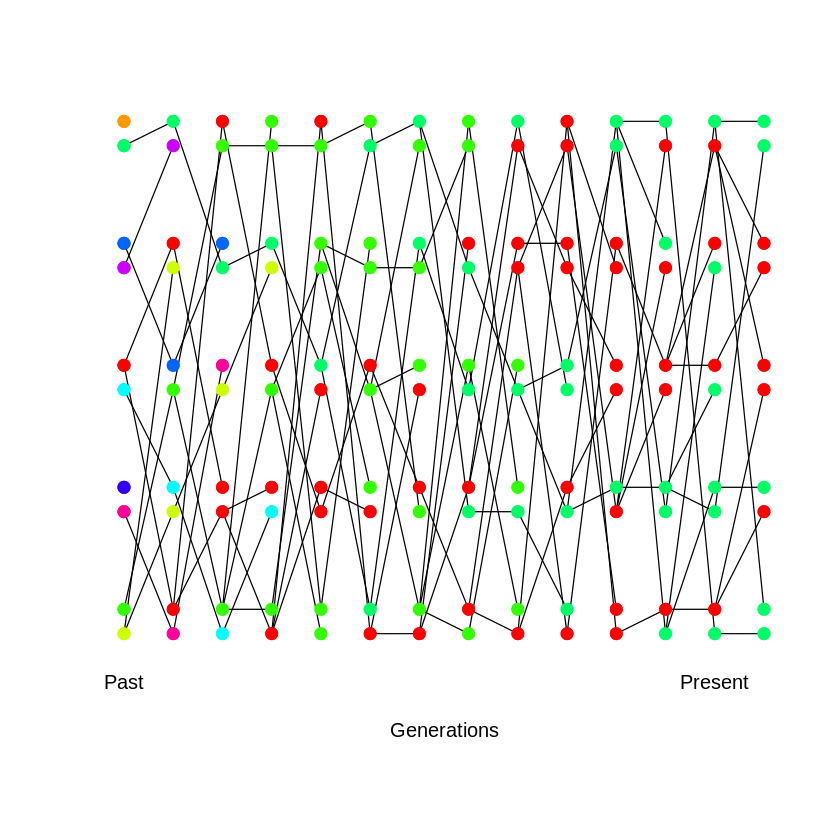

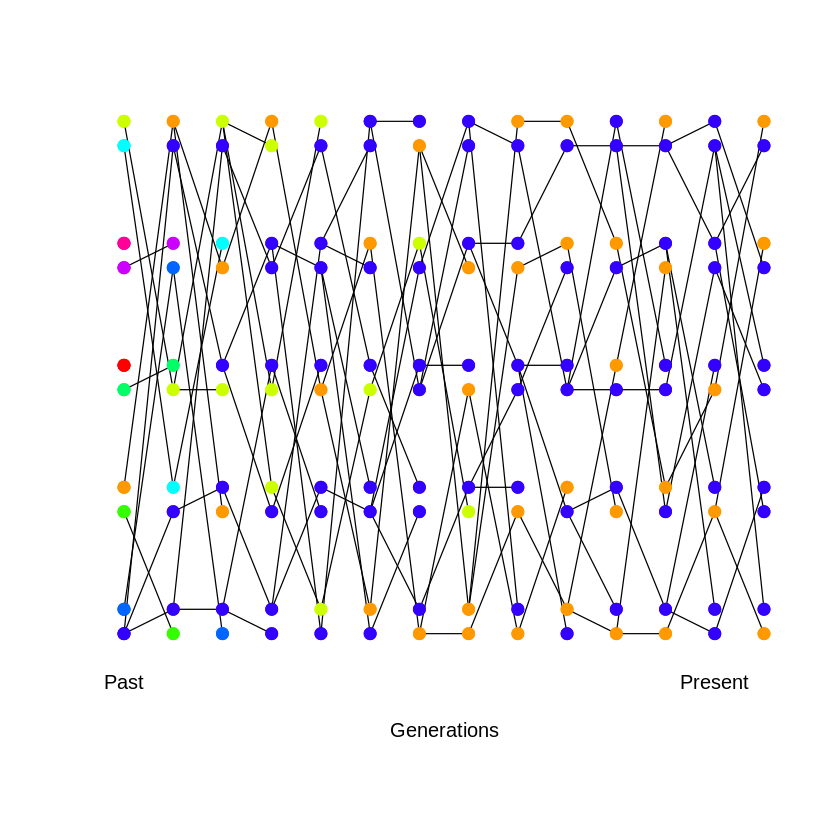

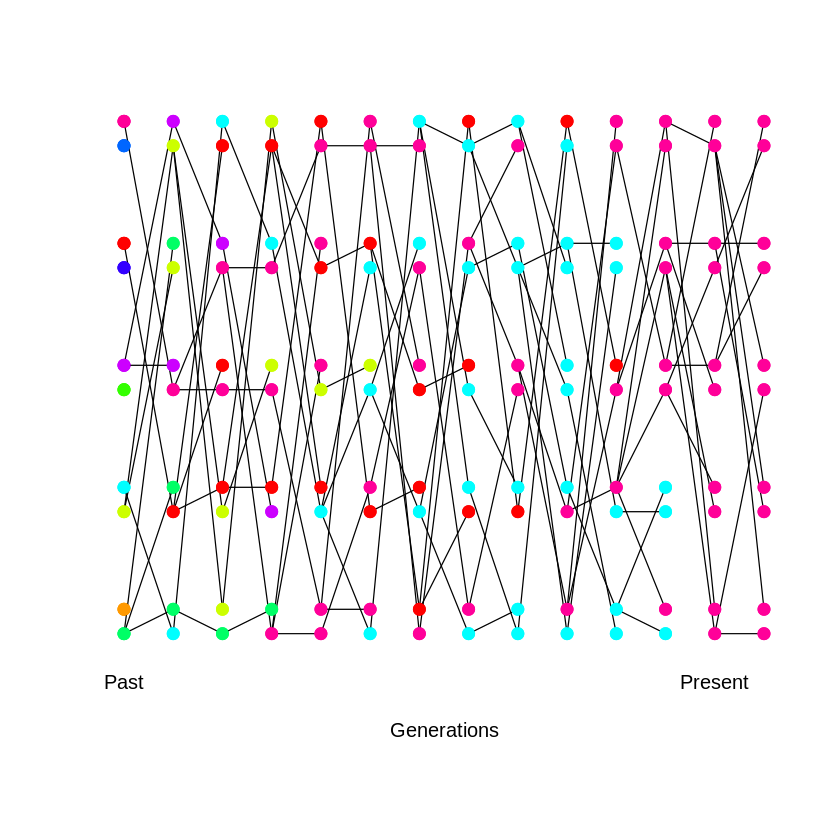

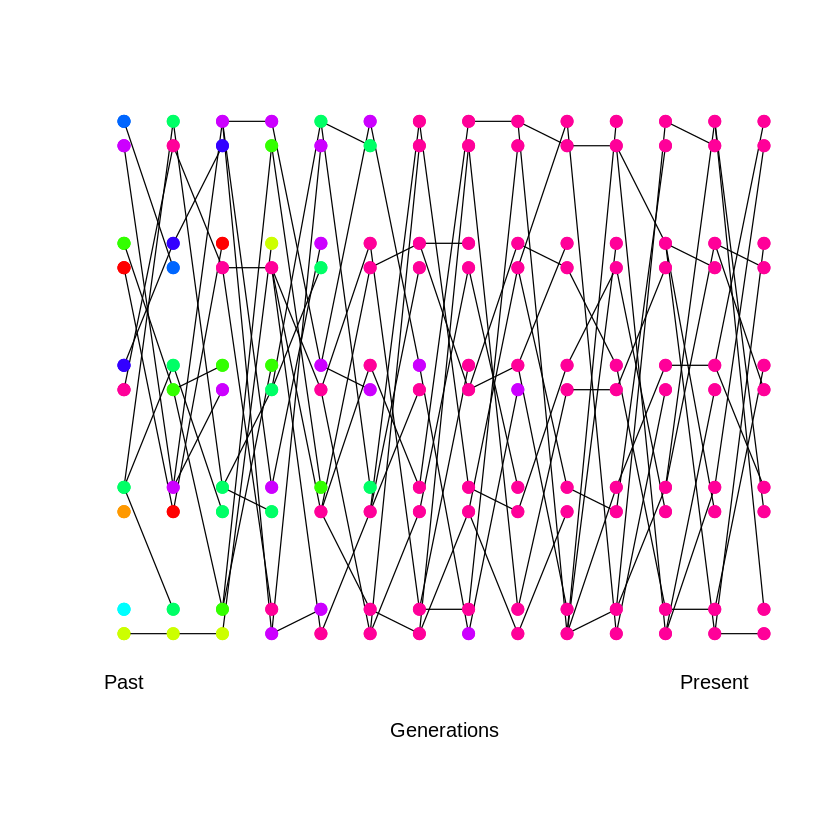

In [3]:
simulate.pop(N.vec=rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")


In [ ]:
	simulate.pop(N.vec= rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="two.alleles")
	simulate.pop(N.vec= rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="two.alleles")
	simulate.pop(N.vec= rep(5,15), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="two.alleles")


In [ ]:
single.crash<- c(rep(10,5),rep(3,2),rep(10,5))
simulate.pop(N.vec=single.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=single.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=single.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")

In [ ]:
repeated.crash<- c(rep(10,5),rep(3,2),rep(10,5),rep(3,2),rep(10,5))
simulate.pop(N.vec=repeated.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=repeated.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
simulate.pop(N.vec=repeated.crash, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")

In [ ]:
simulate.pop(N.vec=rep(10,10), const.RS=FALSE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
	simulate.pop(N.vec=rep(10,10), const.RS=FALSE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")
	simulate.pop(N.vec=rep(10,10), const.RS=FALSE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff")


### MUTATION

In [ ]:
simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.1, for.class= TRUE, initial.state="all.black")
	simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.1, for.class= TRUE, initial.state="all.black")
	simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.1, for.class= TRUE, initial.state="all.black")

In [ ]:
simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation=TRUE, mut.rate=  0.2, for.class= TRUE, initial.state="all.black")
	simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.2, for.class= TRUE, initial.state="all.black")
	simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, mut.rate=  0.2, for.class= TRUE, initial.state="all.black")

In [ ]:
simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, for.class= TRUE,plot.freqs=TRUE,initial.state="all.black")
simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, for.class= TRUE,plot.freqs=TRUE,initial.state="all.black")
simulate.pop(N.vec=rep(5,30), const.RS=TRUE,  mutation= TRUE, for.class= TRUE,plot.freqs=TRUE,initial.state="all.black")

####Incomplete lineage sorting


In [ ]:
####Incomplete lineage sorting
one.out.of.3<-c(rep(1,5),rep(0,10))
two.out.of.3<-c(rep(1,5),rep(2,5),rep(0,5))
three.out.of.3<-c(rep(1,5),rep(2,5),rep(3,5))
pops<-list()
pops[["ind.pop.par"]]<-	matrix(c(rep(one.out.of.3,5),c(rep(1,10),rep(0,5)),rep(two.out.of.3,4),c(rep(1,5),rep(2,10)) ,rep(three.out.of.3,15)),nrow=15)

N.vec<-apply(pops[["ind.pop.par"]],2,function(x){sum(x!=0)})
#N.vec<-apply(ind.pop.par,2,function(x){sum(x!=0)})
num.gens<- length(N.vec)-1
pops[["ind.pop"]]<-sapply(1:num.gens,function(i){c(rep(1,5),rep(2,5),rep(3,5))})

replicate(100,{
		simulate.pop(N.vec=N.vec, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="all.diff",mult.pop=TRUE,pops=pops)
		lines(x=c(6.5,100),y=c(5.5,5.5),lwd=4,col="darkgrey")	##show barrier to migration
		lines(x=c(11.5,100),y=c(10.5,10.5),lwd=4,col="darkgrey")
})

In [ ]:
replicate(100,{
		simulate.pop(N.vec=N.vec, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="single.mut",mult.pop=TRUE,pops=pops)
		lines(x=c(6.5,100),y=c(5.5,5.5),lwd=4,col="darkgrey")	##show barrier to migration
		lines(x=c(11.5,100),y=c(10.5,10.5),lwd=4,col="darkgrey")
})

In [ ]:
one.out.of.2<-c(rep(1,5),rep(0,5))
	two.out.of.2<-c(rep(1,5),rep(2,5))
	ind.pop.par<-	matrix(c(rep(one.out.of.2,5),rep(1,10),rep(two.out.of.2,8)),nrow=10)
	N.vec<-apply(ind.pop.par,2,function(x){sum(x!=0)})
	ind.pop<-sapply(1:ncol(ind.pop.par),function(i){c(rep(1,5),rep(2,5))})

	replicate(50,{
		simulate.pop(N.vec=N.vec, const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="two.alleles",mult.pop=TRUE,pops=pops,plot.freqs=TRUE)
	#	lines(x=c(6.5,100),y=c(5.5,5.5),lwd=4,col="darkgrey")	##show barrier to migration
	})

   	pdf(file=paste(my.dir,"single_mut_figures.pdf",sep=""),width=15,height=8) #,width = 800, height = 400
	replicate(100,{
		simulate.pop(N.vec=rep(5,20), const.RS=TRUE,  mutation= FALSE, for.class= TRUE, initial.state="single.mut")	})

In [ ]:
##simulate demography
single.crash<- c(rep(10,10),rep(3,2),rep(10,5))
simulate.pop(N.vec=single.crash, const.RS=TRUE,  mutation= TRUE, mut.rate=  0.05, for.class= TRUE, initial.state="all.black")

pop.growth<- c(rep(2,3),2^c(1:4,4))
simulate.pop(N.vec=pop.growth, const.RS=TRUE,  mutation= TRUE, mut.rate=  0.05, for.class= TRUE, initial.state="all.black")